<a href="https://colab.research.google.com/github/Guilherme20050/portfolio-automacao-industrial/blob/main/Projeto1_manutencao_preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       190
           1       0.00      0.00      0.00        10

    accuracy                           0.95       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.90      0.95      0.93       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


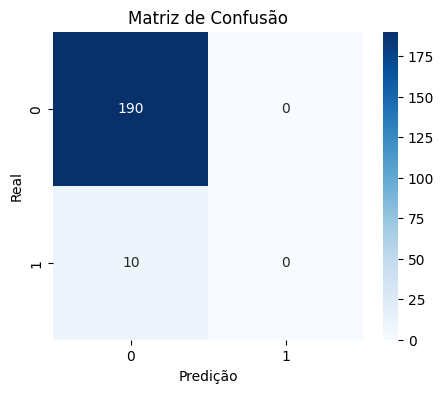

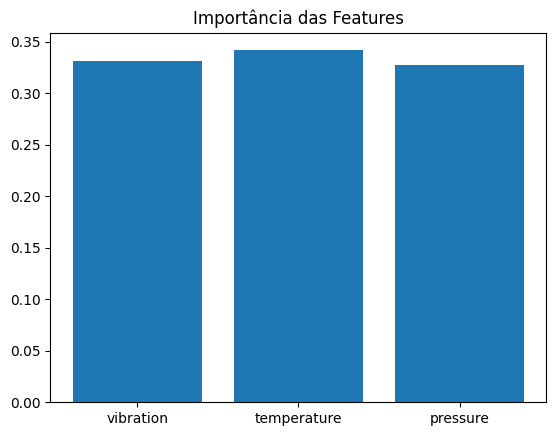

Previsão: [0]


In [14]:
# PROJETO: MANUTENÇÃO PREDITIVA INDUSTRIAL
# ============================================

# 1. Importação
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Dataset Simulado
np.random.seed(42)
data = pd.DataFrame({
    'vibration': np.random.normal(0, 1, 1000),
    'temperature': np.random.normal(70, 5, 1000),
    'pressure': np.random.normal(30, 2, 1000),
    'failure': np.random.choice([0,1], 1000, p=[0.95,0.05])
})

data.to_csv("/content/dataset_simulado.csv", index=False)

data.head()

# 3. Treino/Teste
X = data.drop('failure', axis=1)
y = data['failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modelo
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# 5. Avaliação
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 6. Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

# 7. Importância das Features
importances = model.feature_importances_
plt.bar(X.columns, importances)
plt.title("Importância das Features")
plt.show()

# 8. Predição Exemplo
novo = pd.DataFrame({
    "vibration":[0.5],
    "temperature":[72],
    "pressure":[29]
})

print("Previsão:", model.predict(novo))
